In [3]:


%matplotlib inline 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

df_olympics = pd.read_csv('athlete_events.csv', encoding='latin1')


In [4]:
#Task 1-a: Print the details of the df_olympics data frame (information such as number of rows,columns, name of columns, etc)

print ("Task 1-a: Details of df_olympics data frame are:")
df_olympics.info()

#Task 1-b: Find the number of rows and columns in the df_olympics data frame.
num_rows = df_olympics.shape[0]
num_cols = df_olympics.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s" % (num_rows, num_cols)) 

#Task 1-c: Print the descriptive detail (min, max, quartiles etc) for 'Age' column of  the df_olympics
print ("\n\n>>Task 1-c: Descriptive details of age column are\n",df_olympics['Age'].describe())

#Task 1-d: Print the number of years from the first game until the last in our data-set, and the number of  unique values for 'games'.
num_tot_years  = df_olympics['Year'].max() - df_olympics['Year'].min()
num_uniq_games = df_olympics['Games'].nunique()
print ("\n\n >>Task 1-d: In our dataset we have historical data for %s years, and for %s games. " % (num_tot_years, num_uniq_games))


Task 1-a: Details of df_olympics data frame are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


>>Task 1-b: Number of rows:271116 and number of columns:15


>>Task 1-c: Descriptive details of age column are
 count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max   

In [5]:

#Task 2-a: Find out the total number of female and male athletes that participated on the 2004 Olympics Games
Uni_years=df_olympics.groupby('Year')
y2004 = Uni_years.get_group(2004)
gender = y2004.groupby('Sex')
num_female_2004 = gender.get_group('F').nunique()['ID']
num_male_2004   = gender.get_group('M').nunique()['ID']
print (">>Task 2-a: At the Olympics of 2004, there were participating %s female and %s male athletes" 
       % (num_female_2004, num_male_2004))


#Task 2-b: Find out the total number of awarded metals for the year 1896, and the year 2016.
#Utilize the property of cell's missing values

num_medals_1986 = df_olympics[(df_olympics.Year==1896) & (df_olympics.Medal != 'NA')]['Medal'].count()
num_medals_2016 = df_olympics[(df_olympics.Year==2016) & (df_olympics.Medal != 'NA')]['Medal'].count()

print ("\n\n>>Task 2-b: The total number of metals awarded in 1896 was %s, while in 2016 was %s" 
       % (num_medals_1986, num_medals_2016))


#Task 2-c: Find out the top 10 athletes with the most gold medals for all years.
top10_gold_athletes=df_olympics[df_olympics.Medal == "Gold"]['Name'].value_counts().head(10)
print ("\n\n>>Task 2-c: The top 10 athletes for all years are: \n%s" % (top10_gold_athletes))


>>Task 2-a: At the Olympics of 2004, there were participating 4300 female and 6257 male athletes


>>Task 2-b: The total number of metals awarded in 1896 was 143, while in 2016 was 2023


>>Task 2-c: The top 10 athletes for all years are: 
Michael Fred Phelps, II                            23
Raymond Clarence "Ray" Ewry                        10
Mark Andrew Spitz                                   9
Larysa Semenivna Latynina (Diriy-)                  9
Paavo Johannes Nurmi                                9
Frederick Carlton "Carl" Lewis                      9
Ole Einar Bjrndalen                                 8
Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     8
Birgit Fischer-Schmidt                              8
Sawao Kato                                          8
Name: Name, dtype: int64


Text(0.5,1,' Athletes in each summer Olympic game')

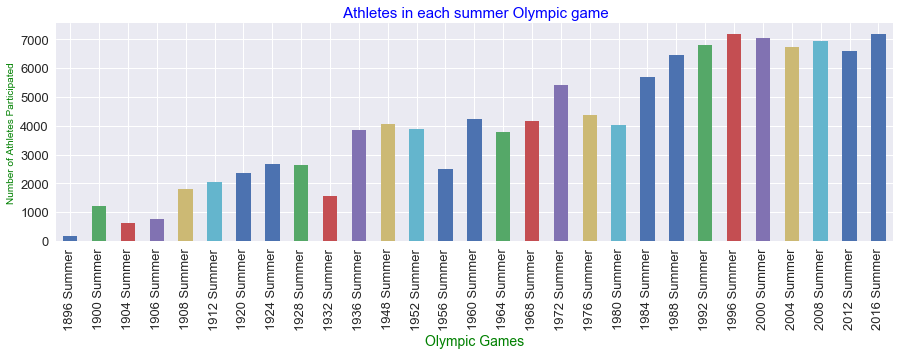

In [13]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 15 points
# Task 3-a: Draw a histogram for total number of athletes participated in all Summer Olympic Games. 
# Think of a way to nicely visualize the all years of Summer Olympics! 
#########################begin code for Task 3-a

fig, ax = plt.subplots(figsize=(15,5))
athelets = df_olympics.drop_duplicates('ID')
Summer_olympics= athelets[athelets.Season=='Summer']
ASummer =Summer_olympics.groupby('Games').count()['ID']
C =ASummer.plot.bar(figsize=(15,4))
#C = plt.hist(ASummer)


ax.set_xlabel('Olympic Games', size=14, color="GREEN")
ax.set_ylabel('Number of Athletes Participated', size=10, color="GREEN")
ax.set_title(' Athletes in each summer Olympic game', size=15, color="BLUE")

#########################end code for Task 3-a

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

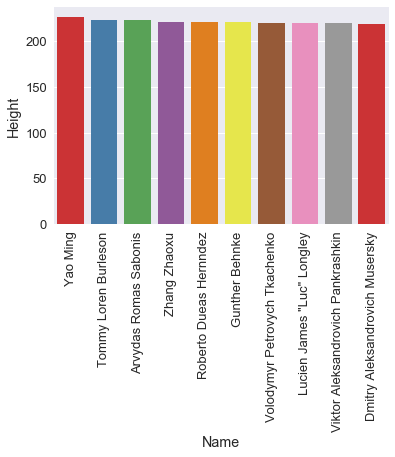

In [14]:
# 15 points
# Task 3-b: Draw a "vertical" bar chart that lists the top-10 talest althlets for all years.
# Remember to make the bar chart into a vertical bar chart
#########################begin code for Task 3-b 
tall = df_olympics.sort_values('Height', ascending= False)
tall = tall[['ID','Name','Height']]
top10 = tall.drop_duplicates(['ID']).head(10)


plot = sns.barplot(x='Name',y='Height', data=top10,palette=sns.color_palette('Set1',10))
plt.xticks(rotation=90)
#plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

#########################end code for Task 3-b

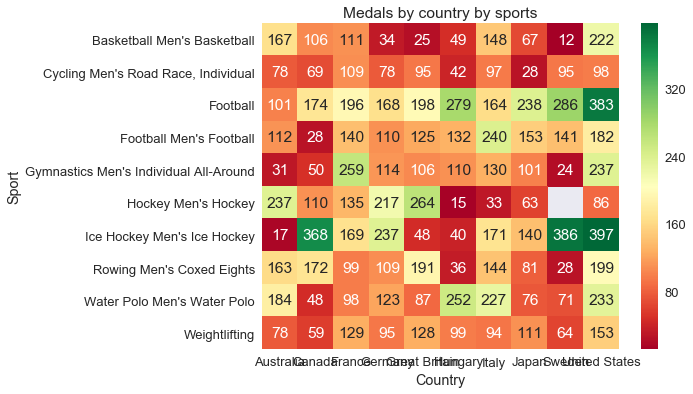

Conclusion----The above plot shows us the Medals own by the countries for the respective sports.From this observation, the country SWEDEN has never played the Hockey Men's hockey game.The color from Dark Red to Dark Green will indicate the number of Medals. As the medals increses, the color swifts from red to green.

 
 
#citations- https://www.kaggle.com/gsdeepakkumar/gold-hunters/notebook, 
https://www.kaggle.com/heesoo37/olympic-history-data-a-thorough-analysis/notebook, 
https://www.kaggle.com/ashishdhadwal5/olympics-analysis/notebook, 
https://www.kaggle.com/ash316/great-olympians-eda/notebook 


In [16]:
################################begin code of task 4

fig, ax = plt.subplots(figsize=(15,5))
df_olympics.loc[df_olympics['Event'].str.contains('Wrestling'),'Event']='Football'
df_olympics.loc[df_olympics['Event'].str.contains('Weightlifting'),'Event']='Weightlifting'
test=df_olympics[df_olympics['Team'].isin(df_olympics['Team'].value_counts()[:10].index)]
test=test[test['Event'].isin(df_olympics['Event'].value_counts()[:10].index)]
test=test.groupby(['Team','Event'])['Sport'].count().reset_index()
test=test.pivot('Event','Team','Sport')
sns.heatmap(test,cmap='RdYlGn',annot=True,fmt='2.0f')
ax.set_xlabel('Country')
ax.set_ylabel('Sport')
ax.set_title("Medals by country by sports")

fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()
print("Conclusion----The above plot shows us the Medals own by the countries for the respective sports."
     "From this observation, the country SWEDEN has never played the Hockey Men's hockey "
     "game.The color from Dark Red to Dark Green will indicate the number of Medals."
                     " As the medals increses, the color swifts from red to green.")
##############################end code of task 4


print("\n \n \n"
      "#citations- https://www.kaggle.com/gsdeepakkumar/gold-hunters/notebook, ")
print("https://www.kaggle.com/heesoo37/olympic-history-data-a-thorough-analysis/notebook, ")
print( "https://www.kaggle.com/ashishdhadwal5/olympics-analysis/notebook, ")
print("https://www.kaggle.com/ash316/great-olympians-eda/notebook ")